# Table of contents

[1. Which regions have the lowest and highest prices of Avocado ?](#Question_no1) </br>
[2. What region with highest produciton of Avocado ?](#Question_no2)<br>
[3. What is the average avocado price in each year ?](#Question_no3)<br>
[4. What is th average avocado volume in each year ?](#Quesion_no4) <br>


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
df = df.drop(['Unnamed: 0', 'Date', '4046', '4225', '4770'], axis = 1)
df.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
def get_average(df,column):
    return sum(df[column]) / len(df)

def get_average_between_two_columns(df, column1, column2):
    
    lst = list(df[column1].unique())
    average = []
    for i in lst:
        x = df[df[column1] == i] 
        column1_average = get_average(x,column2)
        average.append(column1_average)
    
    df_column1_column_2 = pd.DataFrame({'column1':lst, 'column2':average})       
    column1_column_sorted_index = df_column1_column_2.column2.sort_values(ascending=False).index.values
    column1_column_sorted_data = df_column1_column_2.reindex(column1_column_sorted_index)
    
    return column1_column_sorted_data

In [9]:
def plot(data, xlabel, ylabel):
    plt.figure(figsize=(15,5))
    ax = sns.barplot(x = data.column1, y = data.column2, palette = "Spectral", hue = data.column1 , legend=False)
    plt.xticks(rotation  = 90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"Average {ylabel} of Avocado according to {xlabel}")

<a id="Question_no1"></a>
### Which regions have the lowest and highest prices of Avocado

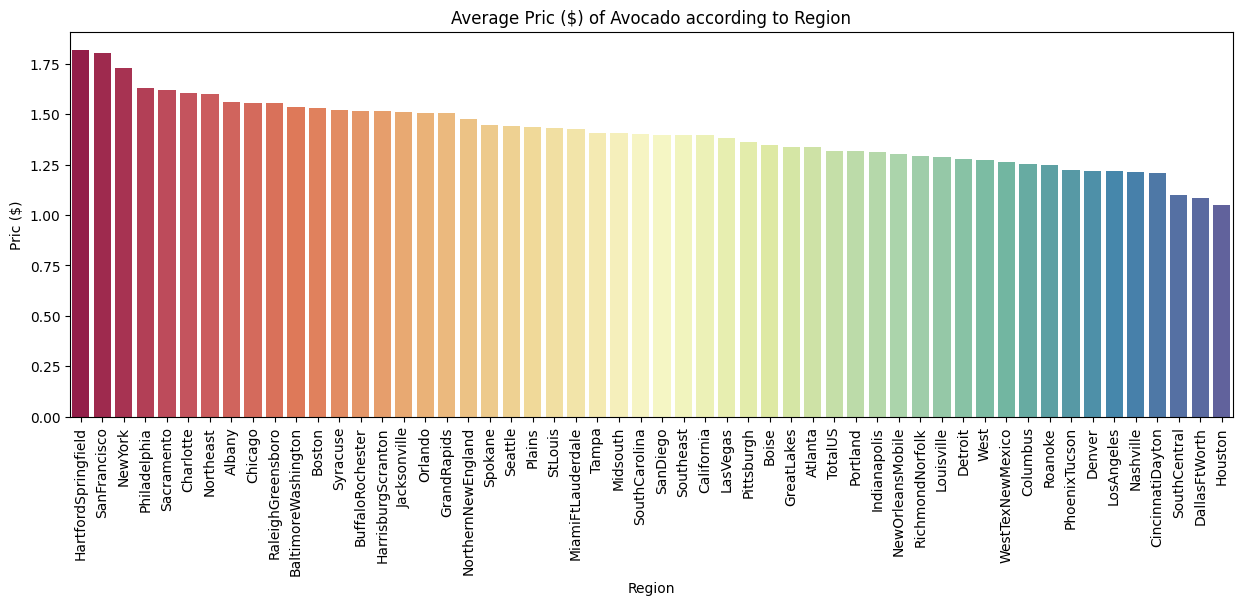

In [10]:
data = get_average_between_two_columns(df, "region", "AveragePrice")
plot(data, "Region", "Pric ($)")

In [11]:
data

,column1,column2
17,HartfordSpringfield,1.818639
42,SanFrancisco,1.804201
28,NewYork,1.727574
32,Philadelphia,1.632130
40,Sacramento,1.621568
7,Charlotte,1.606036
29,Northeast,1.601923
0,Albany,1.561036
8,Chicago,1.556775
37,RaleighGreensboro,1.555118


- HartfordSpringfield is the region with the highest average price of Avocado
- Houston is the region with lowest average prices 

<a id = "Question_no2"></a>
### What region with highest produciton of Avocado

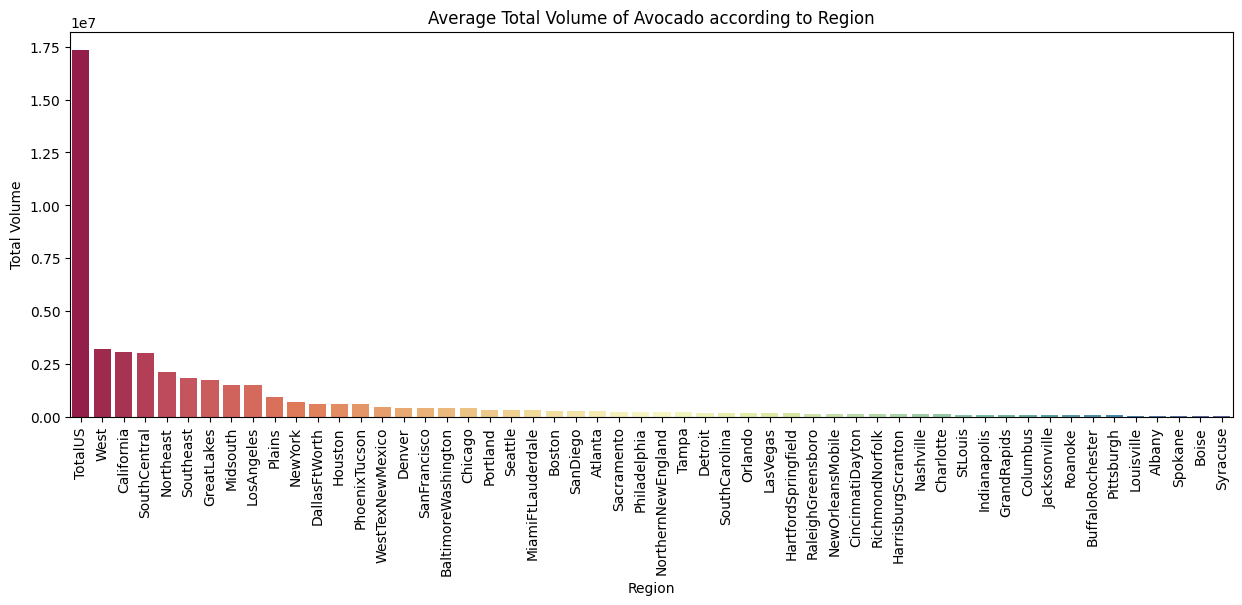

In [36]:
data2 = get_average_between_two_columns(df, "region", "Total Volume")
plot(data2, "Region", "Total Volume")

- Clearly, Total US is an outlier value

In [37]:
data2

,column1,column2
51,TotalUS,1.735130e+07
52,West,3.215323e+06
6,California,3.044324e+06
45,SouthCentral,2.991952e+06
29,Northeast,2.110299e+06
46,Southeast,1.820232e+06
15,GreatLakes,1.744505e+06
25,Midsouth,1.503992e+06
22,LosAngeles,1.502653e+06
35,Plains,9.206761e+05


In [38]:
data2[data2["column1"] == "TotalUS"].index

Index([51], dtype='int64')

In [39]:
data2 = data2.drop(51)
data2

,column1,column2
52,West,3.215323e+06
6,California,3.044324e+06
45,SouthCentral,2.991952e+06
29,Northeast,2.110299e+06
46,Southeast,1.820232e+06
15,GreatLakes,1.744505e+06
25,Midsouth,1.503992e+06
22,LosAngeles,1.502653e+06
35,Plains,9.206761e+05
28,NewYork,7.122311e+05


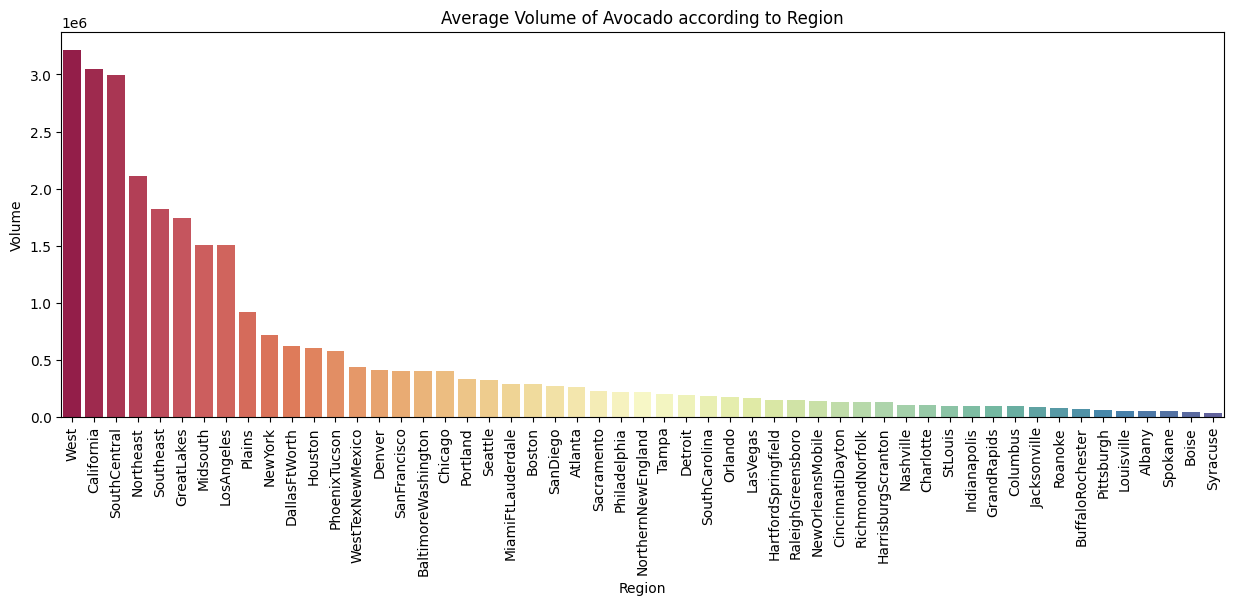

In [40]:
plot(data2,"Region", "Volume")

<a id = "Question_no3"></a>
### What is the average avocado prices in each year? 

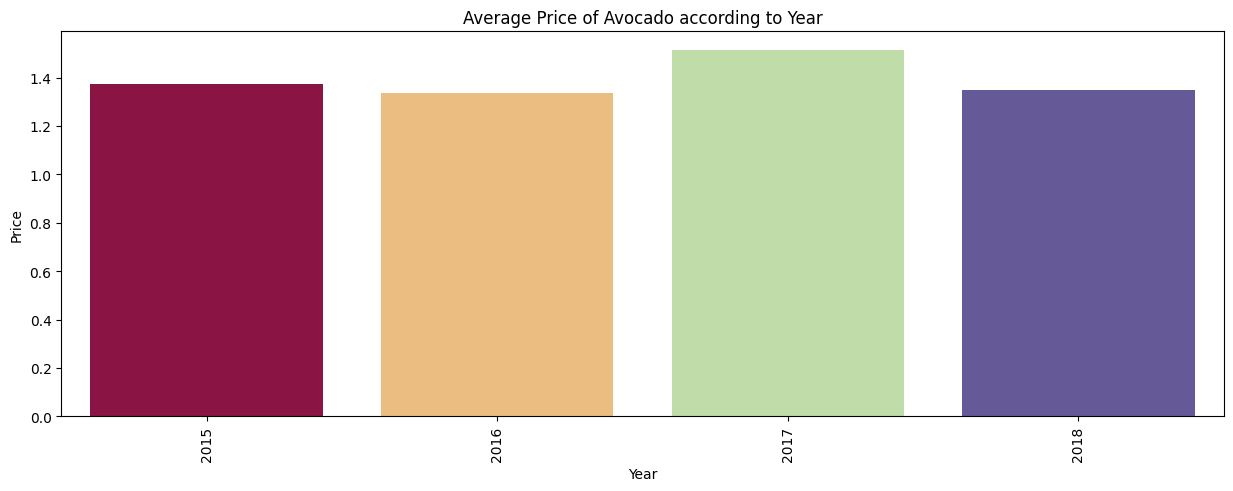

In [ ]:
data3 = get_average_between_two_columns(df,"year", "AveragePrice")
plot(data3,"Year", "Price")

<a id = "Question_no4"></a>
### What is the average avocado volume in each year?

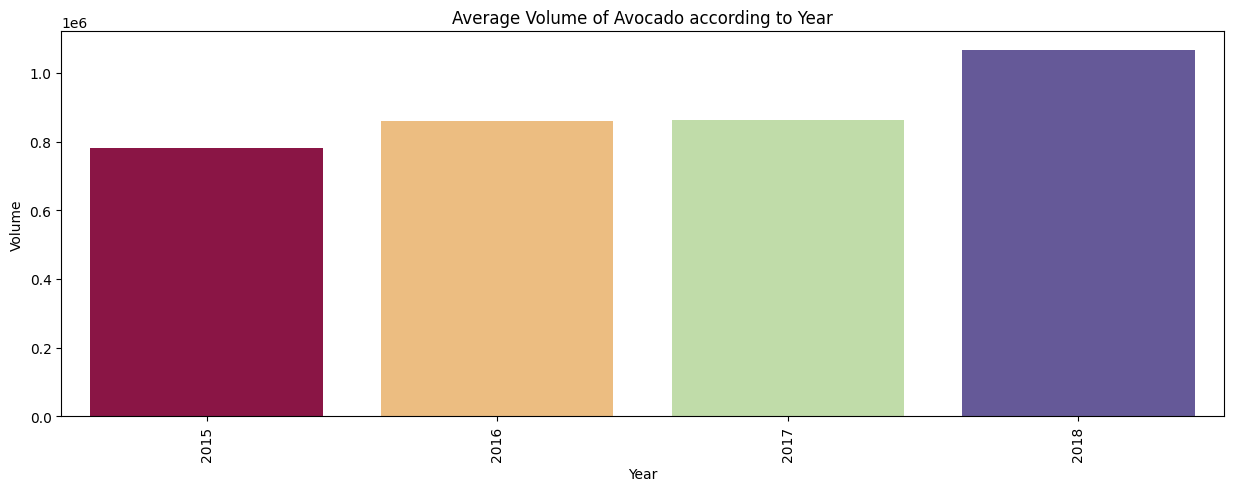

In [44]:
data4 = get_average_between_two_columns(df, "year", "Total Volume")
plot(data4, 'Year', 'Volume')

### Data Modeling

- Converting some columns to categorical data then to numeric

In [46]:
df['region'] = df['region'].astype('category')
df['region'] = df['region'].cat.codes

In [48]:
df.region.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53], dtype=int8)

In [49]:
df["type"] = df["type"].astype('category')
df["type"] = df["type"].cat.codes

In [52]:
df.type.unique()

array([0, 1], dtype=int8)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   Total Bags    18249 non-null  float64
 3   Small Bags    18249 non-null  float64
 4   Large Bags    18249 non-null  float64
 5   XLarge Bags   18249 non-null  float64
 6   type          18249 non-null  int8   
 7   year          18249 non-null  int64  
 8   region        18249 non-null  int8   
dtypes: float64(6), int64(1), int8(2)
memory usage: 1.0 MB


In [55]:
#Split into X and Y&

X = df.drop("AveragePrice", axis=1)
y = df["AveragePrice"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state= 0)

In [57]:
print(f"Training Data : {X_train.shape} samples")
print(f"Testing Data : {X_test.shape} samples")

Training Data : (12774, 8) samples
Testing Data : (5475, 8) samples


In [60]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [62]:
from sklearn.metrics import r2_score

test_pre = model.predict(X_test)
test_score = r2_score(y_test, test_pre)

print("The accuracy of testing dataset ", test_score)

The accuracy of testing dataset  0.38949803997083454


In [63]:
train_pre = model.predict(X_train)
test_score = r2_score(y_train, train_pre)

print("The accuracy of testing dataset ", test_score)

The accuracy of testing dataset  0.3954085418061788


In [69]:
bias = model.score(X_train, y_train)
bias

0.3954085418061788

In [71]:
variance = model.score(X_test, y_test)
variance

0.38949803997083454